# HW04 
## Pre-Lecture HW

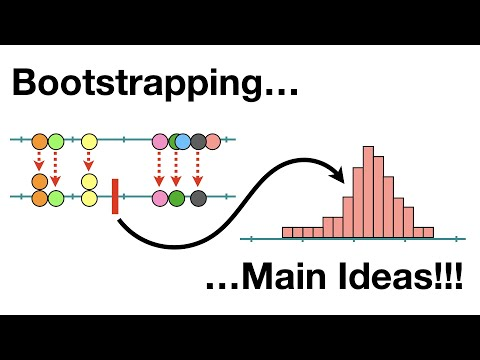

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

### Question 1 (Didn't use chat for this question)
Standard error of the mean refers to the variance of the sample mean. Like what are the uncertainties pertaining to the sample mean. While the standard deviation refers to the variance in the sample itself. So whether the sample has outliers or how tightly compacted the samples are around its mean. 
### Question 2
First, obtain the boostrapped sample mean. Second, we have to calculate the standard deviation of the bootstrapped sample mean. Third, calculate the standard error of the mean of our bootstrapped distribution. Fourth, determine the critical value for the confidence interval we are trying to calculate. Since we are trying to calculate the confidence interval of 95%, our critical value would be 1.96. Finally, we would calculate the confidence interval. 

#### Chat Summary: 

https://chatgpt.com/share/66fecd0f-bdb8-8013-b949-cbc5f89e3c5f

Confidence Intervals Using Standard Error: We talked about how to calculate the confidence interval (CI) of a bootstrapped distribution using the standard error of the mean (SEM). The confidence interval is constructed by taking the mean of the bootstrapped distribution and adding or subtracting a multiple of the SEM, where the multiple depends on the desired confidence level (e.g., 1.96 for 95% confidence).

Percentile Method: We covered the percentile method for calculating confidence intervals from a bootstrapped distribution. This method involves sorting the bootstrap estimates and selecting the percentiles that correspond to the desired confidence level. For a 95% confidence interval, you take the 2.5th and 97.5th percentiles from the sorted bootstrap estimates. This method doesn't assume the distribution is normal.

Critical Values: We discussed that the critical value used in confidence interval calculations depends on the chosen confidence level. For instance:
    1. A 90% confidence level has a critical value of 1.645.
    2. A 95% confidence level has a critical value of 1.96.
    3. A 99% confidence level has a critical value of 2.576.
    
Normal Distribution Clarification: We cleared up a common misconception that 95% of a normal distribution falls within exactly 2 standard deviations of the mean. The actual value is 1.96 standard deviations, which is used as the critical value when constructing a 95% confidence interval.

### Question 3 (I asked chat about the percentile method in the summary above)
We would have to use the percentile method. First, obtain the bootstrapped distribution. Second, sort the statistic that we have boostrapped in ascending order. Third, determine the lower and uppper percentiles for our confidence interval. Since we are trying to go for 95% confidence interval, we have to find the 2.5th percentile and the 97.5th percentile. Finally, the upper and lower bound values we have would the range of our confidence interval. The np.quantile() function can help us complete this task. This we can just input the lower and upper bound in terms of percentiles into np.quantile() and it will return the value of those percentiles.  
### Question 4

In [26]:
import numpy as np

def bootstrap_mean_ci(data, num_bootstrap=1000, confidence_level=0.95):
    # so that it would give us the same data random data everytime
    np.random.seed(42)   

    # calculating the bootstrapped sample mean 
    bootstrap_means = np.array([np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(num_bootstrap)])

    # evaluating the confidence interval using the percentile method 
    lower_bound, upper_bound = np.quantile(bootstrap_means, [(1 - confidence_level) / 2, (1 + confidence_level) / 2])
    
    return lower_bound, upper_bound

# Example usage
data = np.random.normal(0, 1, 100)
ci_lower, ci_upper = bootstrap_mean_ci(data)
print(f"95% confidence interval for the population mean: ({ci_lower}, {ci_upper})")

95% confidence interval for the population mean: (-0.20435105136364898, 0.21287653161901568)


In [30]:
import numpy as np

def bootstrap_median_ci(data, num_bootstrap=1000, confidence_level=0.95): 
    np.random.seed(42)
    
    # calculating the bootstrapped sample median
    bootstrap_medians = np.array([np.median(np.random.choice(data, size=len(data), replace=True)) 
                                  for _ in range(num_bootstrap)])
    
    # evaluating the confidence interval using the percentile method 
    lower_bound, upper_bound = np.quantile(bootstrap_medians, [(1 - confidence_level) / 2, 
                                                                     (1 + confidence_level) / 2])
    
    return np.median(bootstrap_medians), lower_bound, upper_bound

data = np.random.normal(0, 1, 100)
median, ci_lower, ci_upper = bootstrap_median_ci(data)
print(f"Bootstrapped population median: ({median})")
print(f"95% confidence interval for the population median: ({ci_lower}, {ci_upper})")

The population median: (-0.09305062769881221)
95% confidence interval for the population median: (-0.26839744670014787, 0.17954571467891242)


The only thing I had to change between finding the mean and the median of the bootstrapped samples was to change the name of the variables. Then, change the function being called on the bootstrapped sample, and what is being returned by the function. 

#### Chat Summary 

https://chatgpt.com/share/66fed6c7-bd84-8013-b0e9-89441dc665f4

Bootstrapped Confidence Interval for Population Mean:

Discussed how to compute a 95% bootstrapped confidence interval for a population mean using Python. Provided sample code that generates bootstrapped samples, computes their means, and calculates the confidence interval.
Implementing the sort() Function:

Explained how to implement a basic sort() function using the Bubble Sort algorithm. Provided sample code and discussed its time complexity. Mentioned Python’s built-in sort() method for efficiency.
Using sorted() Function:

Clarified that the sorted() function in Python returns a list sorted in ascending order by default. Discussed how to sort in descending order using the reverse parameter.
Calculating Population Median Using Bootstrapped Sample:

Explained how to calculate the population median using bootstrapped samples. Provided sample code that generates bootstrapped samples, computes their medians and calculates a confidence interval for the population median.
Sorting in Bootstrapped Medians:

Addressed a question about whether the bootstrapped_medians array should be sorted. Clarified that sorting is not necessary because the functions used for calculating the median and confidence intervals handle sorting internally.

## Post-Lecture HW

### Question 5 (chat not used) 
This is because sample statistics are just an estimate of the population parameter. We don't know what the actual values are for the population parameter, so we are using what we do know (sample statistics), albeit an estimate, to provide us a range so we can try to "capture" the population parameter. 
### Question 6
1. Bootstrapping refers to the process of repeatedly selecting data points from a sample of the population. The selection process is done randomly, the same data point can be selected multiple times, and the number of data points we are selecting has to be the same size as the sample. Then we can calculate a statistic of interest for each bootstrapped sample. Finally we are able to graph the bootstrapped samples and use that to do interesting statistical analysis. 
2. It's essentially impossible to get data from an entire population. That's why we sample the population instead. But we wouldn't just want to rely on the sample to determine information since a sample is just a small representation of the population. So that's why we use bootstrapping so that the sample could act as the population. 
3. Yes, that is the entire point of bootstrapping. We try to have samples act as the population and using that bootstrapped sample we can calculate whatever statistic we want. If we repeat this process enough times, our statistic can become an estimate to the actual population parameter.
### Question 7
Because even though the observed sample mean isn't 0, there is a chance that the actual population parameter will be 0. Because the confidence interval overlaps 0. Just because the chances are slim, doesn't mean there isn't a chance. To reject the null hypothesis, the confidence interval would have to not overlap 0.

### Question 8

A null hypothesis in this context would mean that the vaccine does not affect the health of the individuals. Meaning it doesn't make them better or worse. So we will be analyzing whether or not the vaccine has a positive effect on the patients

In [4]:
import pandas as pd
vaccine = pd.read_csv("https://raw.githubusercontent.com/cesium132dot9/STA130/refs/heads/main/HW04%20Vaccine%20Data%20Analysis%20Assignment.csv")
vaccine

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


I first bootstrap two values that I care about in the sample, "InitialHealthScore", and "FinalHealthScore". Then I save the bootstrapped values as lists, in "bootstrapped_initial" and "bootstrapped_final" respectively. Finally, I use the bootstrapped values to create two histograms one for "Bootstrapped Initial Health Score" and one for "Bootstrapped Final Health Score". I also purposely put them on the same x and y-axis so they are easier to compare. 

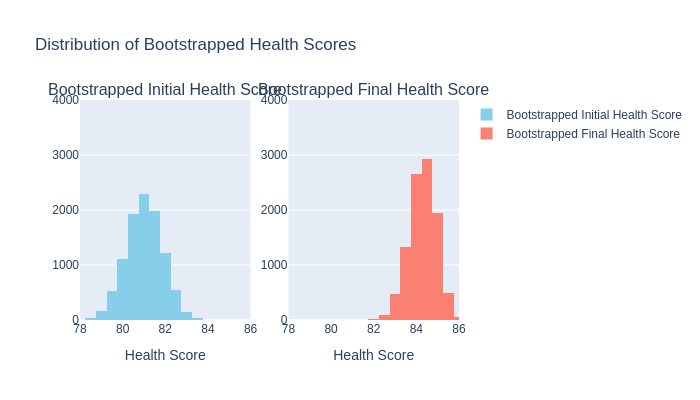

In [36]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.subplots as sp

# Load the dataset
url = "https://raw.githubusercontent.com/cesium132dot9/STA130/refs/heads/main/HW04%20Vaccine%20Data%20Analysis%20Assignment.csv"
vaccine = pd.read_csv(url)

# Function to perform bootstrapping
def bootstrap(data, n_iterations=10000):
    bootstrapped_means = []
    for _ in range(n_iterations):
        # Sample with replacement
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(np.mean(sample))
    return bootstrapped_means

# Bootstrap the InitialHealthScore and FinalHealthScore
bootstrapped_initial = bootstrap(vaccine['InitialHealthScore'])
bootstrapped_final = bootstrap(vaccine['FinalHealthScore'])

# Create subplots for the histograms
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Bootstrapped Initial Health Score', 'Bootstrapped Final Health Score'))

# Add Initial Health Score histogram
fig.add_trace(
    go.Histogram(x=bootstrapped_initial, name='Bootstrapped Initial Health Score', marker_color='skyblue', nbinsx=20),
    row=1, col=1
)

# Add Final Health Score histogram
fig.add_trace(
    go.Histogram(x=bootstrapped_final, name='Bootstrapped Final Health Score', marker_color='salmon', nbinsx=20),
    row=1, col=2
)

# Set the same x-axis and y-axis limits
x_min = min(min(bootstrapped_initial), min(bootstrapped_final))
x_max = max(max(bootstrapped_initial), max(bootstrapped_final))
y_max = 4000

# Update layout to have the same scales
fig.update_xaxes(range=[x_min, x_max], title_text='Health Score')
fig.update_yaxes(range=[0, y_max])

# Update layout
fig.update_layout(
    title_text='Distribution of Bootstrapped Health Scores',
    barmode='overlay',
    height=400
)

# Show the figure
fig.show(renderer="png")

Here I calculated the confidence interval and the mean of the bootstrapped distributions. The data can be seen below. 

In [35]:
def mean_ci(data, confidence_level=0.95):
    # evaluating the confidence interval using the percentile method 
    lower_bound, upper_bound = np.quantile(data, [(1 - confidence_level) / 2, (1 + confidence_level) / 2])
    
    return round(lower_bound, 1), round(upper_bound, 1), round(np.mean(data))

initial_lower_bound, initial_upper_bound, initial_mean = mean_ci(bootstrapped_initial)
final_lower_bound, final_upper_bound, final_mean = mean_ci(bootstrapped_final)

print(f"The confidence interval of the bootstrapped initial health score: ({initial_lower_bound, initial_upper_bound}) \n \
        The mean of the bootstrapped initial health score: {initial_mean}")
print()
print(f"The confidence interval of the bootstrapped final health score: ({final_lower_bound, final_upper_bound}) \n \
        The mean of the bootstrapped final health score: {final_mean}")

The confidence interval of the bootstrapped initial health score: ((79.3, 82.7)) 
         The mean of the bootstrapped initial health score: 81

The confidence interval of the bootstrapped final health score: ((83.0, 85.4)) 
         The mean of the bootstrapped final health score: 84


In this case we have actually rejected the null hypothesis. Since the mean of the bootstrapped initial health score is 81 but the confidence interval of the bootstrapped final health score is between 83 and 85.4. So, 81 isn't part of that interval. Therefore the vaccine only positively affects the patients and never negatively nor has no effect. Following this logic, we can conclude that the null hypothesis has been rejected. 

### Question 9
I have used chat and the wiki textbook extensively this past week to help me strengthen my understanding. I think the lectures has caught me off-guard and I didn't understand what was going on and bootstrapping was confusing me. But after reading the wiki textbook, talking to chat, and doing the homework. I think I've got a good understanding of this week's topics.